In [213]:
import pandas as pd
import numpy as np
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import pickle
import matplotlib.pyplot as plt

from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
try:
    from torch.hub import load_state_dict_from_url
except ImportError:
    from torch.utils.model_zoo import load_url as load_state_dict_from_url

# load model, model dictionary and data

In [55]:
# generate identity and load state dict
#model = IncepLSTM(n = 16)
model = CnnLSTM()
model.load_state_dict(torch.load('../models/CnnLSTM/cnnlstm_230', map_location=torch.device('cpu')))

1 16
16 32


In [49]:
loss = torch.nn.L1Loss()

In [56]:
# set parameter and load data
batch_size = 30
#testdata = '../data/test_10_30.pkl'
testdata = '../data/train.pickle'
polysdata = '../data/matrix_feature.pickle'
test = Data(testdata, polysdata)
dl_test = DataLoader(test, batch_size = batch_size, shuffle = True)

In [89]:
# load predict results
import os

In [297]:
root = '../results/test_10_10/'
#root = '../results/test_10_20/'
#root = '../results/test_10_30/'

In [298]:
fns = os.listdir(root)

In [299]:
# only take the file with npy
fns = [i for i in fns if i.split('.')[-1] == 'npy']
pred = [i for i in fns if i.split('.')[1] == 'pred']
targ = [i for i in fns if i.split('.')[1] == 'tg']
pred.sort()
targ.sort()
# load data
preddata = []
for i in pred:
    preddata.append(np.load(root + i))
targdata = []
for i in targ:
    targdata.append(np.load(root + i))
preddata = np.concatenate(preddata, axis = 0)
targdata = np.concatenate(targdata, axis = 0)
preddata = torch.from_numpy(preddata)
targdata = torch.from_numpy(targdata)

# Evaluate hit rate through prediction

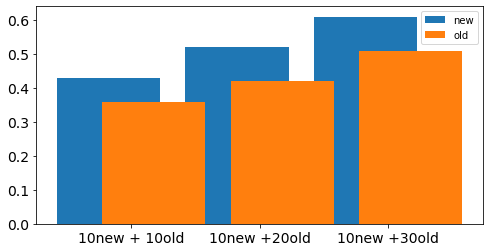

In [396]:
labels = ['10new + 10old', '10new +20old', '10new +30old']
x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots(figsize = (8,4))
ax.bar(x = x-width/2, height = [0.43, 0.52, 0.61], label = 'new')
ax.bar(x = x+width/2, height = [0.36, 0.42, 0.51], label = 'old')
ax.legend()
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.savefig('accu.png', transparent=True, dpi = 300)

In [300]:
metric1(targdata, preddata)

0.4270833333333333

In [301]:
result = metric2(targdata, preddata)

In [302]:
sorted_result= sorted(result.items(), key = lambda x: x[0])

In [274]:
tmp= [i[1] for i in sorted_result]
sum(tmp)

96

In [381]:
new_result30 = [(0, 37), (1, 18), (2, 12), (3, 11), (4, 9), (5, 6), (6, 8), (7, 3), (8, 3), (9, 3), (10, 2), (11, 2), (12, 2), (13, 2), (14, 3), (15, 2), (18, 4), (22, 3), (23, 2), (24, 3), (27, 2),(28,1), (31, 2), (32, 1), (33, 1), (35, 1), (38, 1), (39, 1), (40, 1), (42, 1), (43, 1), (48, 1)]
old_result30 = [(0, 33), (1, 20), (2, 6), (3, 5), (4, 4), (5, 4), (6, 4), (7, 3), (8, 4), (9, 5), (10, 4), (11, 1), (12, 2), (13, 2), (14, 4), (15, 4), (16, 3), (18, 3), (19, 2),(20, 3), (22, 2), (23, 3), (25, 3), (26, 2),(27, 2), (29, 1), (31, 1), (33, 1),(34, 1),(35, 1), (36, 1),(37, 1), (38, 1), (40, 1), (42, 1), (43, 2), (48, 1)]

In [399]:
new_result20 = [(0, 33), (1, 19), (2, 9), (3, 13), (4, 7), (5, 5), (6, 5), (7, 2), (8, 6), (9, 6), (11, 2), (12, 8), (13, 3), (14, 5), (15, 4), (16, 2), (17, 1), (18, 1), (20, 1), (26, 2), (29, 1), (30, 1), (33, 1),(36, 2), (38, 1), (42, 2),(46, 1), (47, 1), (61, 1), (76, 1), (84, 1)]
old_result20 = [(0, 29), (1, 13), (2, 12), (3, 11), (4, 3), (5, 5), (6, 4), (7, 3), (8, 4), (9, 5), (11, 2), (12, 5), (13, 3), (14, 3), (15, 1), (16, 1), (17, 1), (18, 2), (20, 2), (22, 1), (23, 1), (24, 3), (27, 1), (28, 1), (29, 1),(30, 3), (31,2), (33, 1), (34,2), (36, 1), (40, 2), (44,1)]

In [379]:
new_result10 = [(0, 25), (1, 14), (2, 9), (3, 7), (4, 9), (5, 3), (6, 6), (7, 1), (8, 6), (9, 4), (11, 4), (13, 6), (14, 3), (15, 3), (17, 3), (18, 3), (19, 1), (20, 1), (21, 1), (22, 1), (25, 1), (26, 2), (28, 1), (30, 1), (32, 1), (33, 1), (34, 1),(35, 1), (38, 2), (39, 1), (40, 1), (42, 1), (43, 1), (49, 1), (52, 1), (57, 1), (58, 1), (61, 2), (63, 1), (67, 1), (69, 1), (70, 1), (71, 1), (84, 1)]
old_result10 = [(0, 16),(1, 13), (2, 7), (3, 4), (4, 4), (5, 6), (6, 3), (7, 4), (8, 4), (9, 3), (10, 3), (13, 1), (14, 6), (15, 3), (17, 2), (18, 5), (19, 4), (20, 3), (21, 1), (22, 1), (23, 2), (24, 2), (25, 1), (27, 1), (28,1), (30, 1), (32, 1), (33, 1), (35, 4), (36, 3),(37,1),(38, 4), (39, 1), (40, 3), (41, 2), (42,2), (43, 1), (44, 1), (49, 1), (52, 1), (57, 1), (58, 1), (61, 2)]

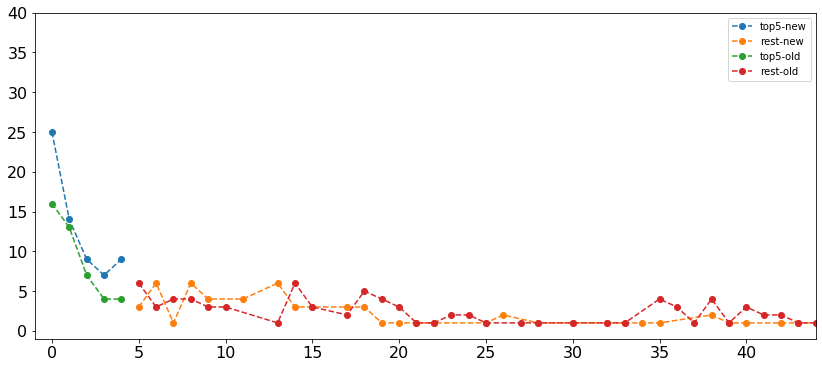

In [393]:
plt.figure(figsize=(14,6))
plt.plot( [i[0] for i in new_result10][:5],  [i[1] for i in new_result10][:5],  'o--', label = 'top5-new')
plt.plot( [i[0] for i in new_result10][5:],  [i[1] for i in new_result10][5:],  'o--', label = 'rest-new')
plt.plot( [i[0] for i in old_result10][:5],  [i[1] for i in old_result10][:5],  'o--', label = 'top5-old')
plt.plot( [i[0] for i in old_result10][5:],  [i[1] for i in old_result10][5:],  'o--', label = 'rest-old')
plt.xlim(-1, 44)
plt.ylim(-1, 40)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.legend()
plt.savefig('test_10_10.png', transparent=True,dpi = 300)

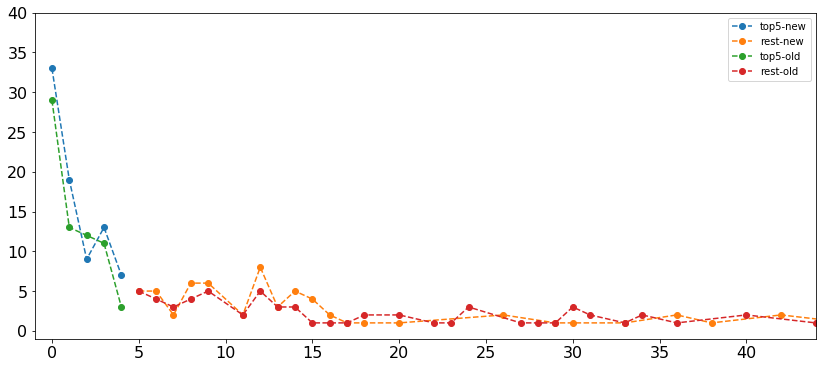

In [400]:
plt.figure(figsize=(14,6))
plt.plot( [i[0] for i in new_result20][:5],  [i[1] for i in new_result20][:5],  'o--', label = 'top5-new')
plt.plot( [i[0] for i in new_result20][5:],  [i[1] for i in new_result20][5:],  'o--', label = 'rest-new')
plt.plot( [i[0] for i in old_result20][:5],  [i[1] for i in old_result20][:5],  'o--', label = 'top5-old')
plt.plot( [i[0] for i in old_result20][5:],  [i[1] for i in old_result20][5:],  'o--', label = 'rest-old')
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlim(-1, 44)
plt.ylim(-1, 40)
plt.legend()
plt.savefig('test_10_20.png', transparent=True, dpi = 300)

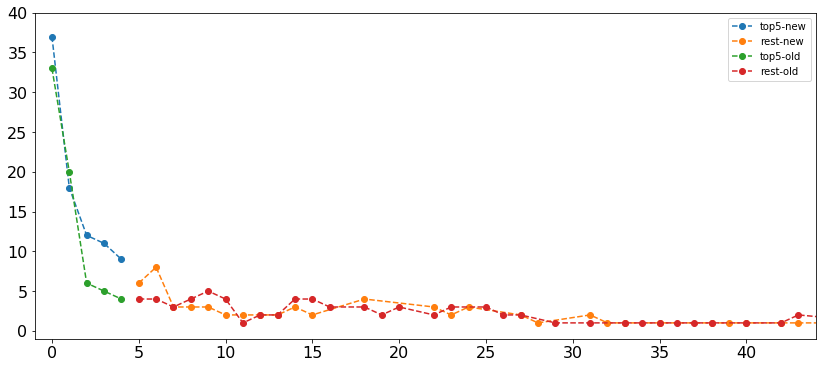

In [391]:
plt.figure(figsize=(14,6))
plt.plot( [i[0] for i in new_result30][:5],  [i[1] for i in new_result30][:5],  'o--', label = 'top5-new')
plt.plot( [i[0] for i in new_result30][5:],  [i[1] for i in new_result30][5:],  'o--', label = 'rest-new')
plt.plot( [i[0] for i in old_result30][:5],  [i[1] for i in old_result30][:5],  'o--', label = 'top5-old')
plt.plot( [i[0] for i in old_result30][5:],  [i[1] for i in old_result30][5:],  'o--', label = 'rest-old')
plt.xlim(-1, 44)
plt.ylim(-1, 40)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.legend()
plt.savefig('test_10_30.png', transparent=True,dpi = 300)

# Evaluate hit rate through model

In [57]:
test_with_loss(dl_test, model, loss, True)

Test Batch:  [0/2827 (0%)]	acc: 0.326048	Time: 1574429170.6443529129028320
Test Batch:  [1/2827 (0%)]	acc: 0.330150	Time: 1574429209.0705909729003906
Test Batch:  [2/2827 (0%)]	acc: 0.296015	Time: 1574429247.4286258220672607
Test Batch:  [3/2827 (0%)]	acc: 0.314346	Time: 1574429283.3786828517913818
Test Batch:  [4/2827 (0%)]	acc: 0.357756	Time: 1574429320.6854641437530518
Test Batch:  [5/2827 (0%)]	acc: 0.288279	Time: 1574429356.7811350822448730


KeyboardInterrupt: 

In [47]:
acc = significant_test(dl_test, model, True)

tensor([29])
tensor([ 1,  8, 29, 14, 19])
**********
Test Batch: [0/548 (0%)]	acc: 1.000000	Time: 1574426465.8332080841064453
tensor([9])
tensor([ 9,  5, 20, 14,  4])
**********
Test Batch: [1/548 (0%)]	acc: 1.000000	Time: 1574426499.5455369949340820
tensor([27])
tensor([20, 27,  3,  2,  5])
**********
Test Batch: [2/548 (0%)]	acc: 1.000000	Time: 1574426532.3810710906982422
tensor([0])
tensor([ 0, 25,  1,  9,  5])
**********
Test Batch: [3/548 (1%)]	acc: 1.000000	Time: 1574426563.7712020874023438
tensor([6])
tensor([ 6, 24, 22,  1, 25])
**********
Test Batch: [4/548 (1%)]	acc: 1.000000	Time: 1574426593.5915231704711914
tensor([4])
tensor([15,  5, 25, 12,  8])
**********
Test Batch: [5/548 (1%)]	acc: 0.833333	Time: 1574426626.0768420696258545
tensor([23])
tensor([ 6, 18,  7, 27, 26])
**********
Test Batch: [6/548 (1%)]	acc: 0.714286	Time: 1574426658.4199190139770508
tensor([6])
tensor([26, 18,  0, 28,  5])
**********
Test Batch: [7/548 (1%)]	acc: 0.625000	Time: 1574426697.17483282089233

KeyboardInterrupt: 

In [37]:
hit_count = metric2(dl_test, model, True)

Test Batch: [0/133 (0%)]	rank: 0.000000	Time: 1574418379.3655438423156738
Test Batch: [1/133 (1%)]	rank: 2.000000	Time: 1574418413.1493220329284668
Test Batch: [2/133 (2%)]	rank: 5.000000	Time: 1574418444.1131520271301270
Test Batch: [3/133 (2%)]	rank: 1.000000	Time: 1574418481.8707590103149414
Test Batch: [4/133 (3%)]	rank: 1.000000	Time: 1574418520.5037281513214111
Test Batch: [5/133 (4%)]	rank: 17.000000	Time: 1574418554.9021828174591064
Test Batch: [6/133 (5%)]	rank: 23.000000	Time: 1574418603.3507330417633057


KeyboardInterrupt: 

In [41]:
len(dl_test)

134

In [72]:
a = torch.FloatTensor(2,3)

In [63]:
a = torch.autograd.Variable(a)

In [77]:
np.concatenate()

array([[ 0.0000000e+00, -0.0000000e+00, -5.0345012e-28],
       [-2.0004880e+00,  2.8025969e-45, -0.0000000e+00]], dtype=float32)

# Predict function

In [ ]:
def predict(dl_test, model, save = True):
    model.eval()
    out = []
    for batch_idx, dat in enumerate(dl_test):
        inp, target = dat
        if inp.shape[0] < 2:
            continue
        out.append(model(inp))
    out = torch.cat(out)
    with open('..', 'wb') as f:
        pickle.dump(predict, f)
    return out

# Evaluation functions with test results

In [155]:
def metric1(target, predict, size_block = 100):
    """
    看每个batch中真实的最佳，在不在我们预测的前五组中，在的话就算正确预测
    遍历所有batch，看预测的准确性
    组分的计算方法是所有配给得分的平均值
    """
    assert(len(target) == len(predict))
    length = len(target)
    num_block = int(length/size_block)
    num_hit = 0
    num_miss = 0
    for i in range(num_block):
        block_tg = target[size_block*i: size_block*(i+1)]
        block_pr = predict[size_block*i: size_block*(i+1)]
        block_tg = block_tg[:, :].mean(dim = 1).squeeze()
        block_pr = block_pr.mean(dim = 1).squeeze()
        #block_tg = torch.cat(block_tg)
        #block_pr = torch.cat(block_pr)
        _, top_target = torch.topk(block_tg, 1, largest = False)
        _, top_predict = torch.topk(block_pr, 5, largest = False)
        if top_target in top_predict:
            num_hit += 1
        else:
            num_miss += 1
    return num_hit * 1.0 / (num_hit + num_miss)

def metric2(target, predict, size_block = 100):
    assert(len(target) == len(predict))
    length = len(target)
    num_block = int(length/size_block)
    hit_count = {}
    for i in range(num_block):
        block_tg = target[size_block*i: size_block*(i+1)]
        block_pr = predict[size_block*i: size_block*(i+1)]
        block_tg = block_tg[:, :].mean(dim = 1).squeeze()
        block_pr = block_pr.mean(dim = 1).squeeze()
        _, index_top_target = torch.topk(block_tg, 1, largest = False)
        _, index_rank = torch.topk(block_pr, len(block_tg), largest = False) # sort排序
        index_rank = index_rank.tolist()
        index_in_rank = index_rank.index(index_top_target)
        if index_in_rank not in hit_count.keys():
            #print('create new key')
            hit_count[index_in_rank] = 1
        else:
            #print('add one')
            hit_count[index_in_rank] = hit_count[index_in_rank] + 1
    return hit_count

def metric3(target, predict, size_block = 100):
    assert(len(target) == len(predict))
    length = len(target)
    num_block = int(length/size_block)
    hit_count = {}
    for i in range(num_block):
        block_tg = target[size_block*i: size_block*(i+1)]
        block_pr = predict[size_block*i: size_block*(i+1)]
        block_tg = block_tg[:, :].mean(dim = 1).squeeze()
        block_pr = block_pr.mean(dim = 1).squeeze()
        #_, index_top_target = torch.topk(target, 1, largest = False)
        _, index_top_out = torch.topk(block_pr, 1, largest = False)
        #_, index_rank = torch.topk(out, len(target), largest = False)
        _, index_rank = torch.topk(block_tg, len(block_tg), largest = False)
        index_rank = index_rank.tolist()
        index_in_rank = index_rank.index(index_top_out)
        if index_in_rank not in hit_count.keys():
            #print('create new key')
            hit_count[index_in_rank] = 1
        else:
            #print('add one')
            hit_count[index_in_rank] = hit_count[index_in_rank] + 1
    return hit_count

# Evaluation functions with model

In [50]:
def test_with_loss(dl_test, model, loss, verbose = False):
    model.eval()
    counter = 0
    hit = 0
    miss = 0
    for batch_idx, dat in enumerate(dl_test):
        counter += 1
        inp, target = dat
        if inp.shape[0] < 2:
            continue
        out = model(inp)
        lo = loss(out.squeeze(), target.squeeze())
        if verbose:
            print('Test Batch:  [{}/{} ({:.0f}%)]\tacc: {:.6f}\tTime: {:.16f}'.format(
                    batch_idx,
                    len(dl_test),
                    100.*batch_idx/len(dl_test),
                    lo,
                    time.time()
                    ))

In [27]:
def evaluate(pm, testdata):
    # read extra test set
    test = pd.read_pickle(testdata)
    test_x = test.iloc[:, :650].values.reshape(len(test), 50, -1)
    test_y = test.iloc[:, 650:].values.reshape(len(test), 50, -1)
    np.save('../data/rnn_test_x', test_x)
    np.save('../data/rnn_test_y', test_y)
    loss = torch.nn.L1Loss()
    test_x = '../data/rnn_test_x.npy'
    test_y = '../data/rnn_test_y.npy'
    test = Data(test_x, test_y)
    dl_test = DataLoader(test, batch_size = 100, shuffle = True)
    model = torch.load(pm)
    me = 0
    for i in range(5):
        lo = significant_test(dl_test, model, loss)
        me += lo
        print('test ' + str(i)+': ' + str(lo))
    hit_count = metric3(dl_test, model, loss)
    hit_count = sorted(hit_count.items(), key = lambda x: x[0])
    #out = [i[1] for i in hit_count]
    out = hit_count
    return (me, out)

In [36]:
def significant_test(dl_test, model, verbose = False):
    """
    看每个batch中真实的最佳，在不在我们预测的前五组中，在的话就算正确预测
    遍历所有batch，看预测的准确性
    组分的计算方法是所有配给得分的平均值
    """
    model.eval()
    counter = 0
    hit = 0
    miss = 0
    for batch_idx, dat in enumerate(dl_test):
        counter += 1
        # codes to be changed
        inp, target = dat
        out = model(inp)
        #target = target.mean(dim = 1)
        target = target[:, :].mean(dim = 1).squeeze()
        out = out.mean(dim = 1).squeeze()
        #out = out[:, :].mean(dim = 1)
        if len(inp) > 5:
            _, top_target = torch.topk(target, 1, largest=False)
            _, top_predict = torch.topk(out, 5, largest = False)
            if verbose:
                print(top_target)
                print(top_predict)
                print('*'*10)
            if top_target in top_predict:
                hit += 1
            else:
                miss += 1
            if verbose:
                print('Test Batch: [{}/{} ({:.0f}%)]\tacc: {:.6f}\tTime: {:.16f}'.format(
                        batch_idx,
                        int(len(test)/batch_size),
                        100.*batch_idx/int(len(test)/batch_size),
                        hit/counter,
                        time.time()
                        ))
    return hit * 1.0/(hit + miss)

def metric2(dl_test, model, verbose = False):
    """
    具体看每个batch中，真实最佳组在预测组中排第几位
    遍历batch，搜集所有排位信息，并搜集在dict中
    """
    model.eval()
    counter = 0
    hit_count = {}
    for batch_idx, dat in enumerate(dl_test):
        counter += 1
        inp, target = dat
        out = model(inp)
        #target = target.mean(dim = 1)
        #out = out.mean(dim = 1)
        target = target[:, :].mean(dim = 1).squeeze()
        out = out[:, :].mean(dim = 1).squeeze()
        if len(inp) > 5:
            _, index_top_target = torch.topk(target, 1, largest = False)
            _, index_rank = torch.topk(out, len(target), largest = False) # sort排序
            index_rank = index_rank.tolist()
            index_in_rank = index_rank.index(index_top_target)
            if index_in_rank not in hit_count.keys():
                #print('create new key')
                hit_count[index_in_rank] = 1
            else:
                #print('add one')
                hit_count[index_in_rank] = hit_count[index_in_rank] + 1
            if verbose:
                print('Test Batch: [{}/{} ({:.0f}%)]\trank: {:.6f}\tTime: {:.16f}'.format(
                        batch_idx,
                        int(len(test)/batch_size),
                        100.*batch_idx/int(len(test)/batch_size),
                        index_in_rank,
                        time.time()
                        ))
    return hit_count

def metric3(dl_test, model, verbose = False):
    """
    和上面的metric2刚好相反
    具体看每个batch中，预测最佳组在batch中所有真实组排第几位
    遍历batch，搜集所有排位信息，并保存在dict中
    """
    model.eval()
    counter = 0
    hit_count = {}
    for batch_idx, dat in enumerate(dl_test):
        counter += 1
        inp, target = dat
        out = model(inp)
        #target = target.mean(dim = 1)
        #out = out.mean(dim = 1)
        target = target[:, :].mean(dim = 1).squeeze()
        out = out[:, :].mean(dim = 1).squeeze()
        if len(inp) > 5:
            #_, index_top_target = torch.topk(target, 1, largest = False)
            _, index_top_out = torch.topk(out, 1, largest = False)
            #_, index_rank = torch.topk(out, len(target), largest = False)
            _, index_rank = torch.topk(target, len(target), largest = False)
            index_rank = index_rank.tolist()
            index_in_rank = index_rank.index(index_top_out)
            if index_in_rank not in hit_count.keys():
                #print('create new key')
                hit_count[index_in_rank] = 1
            else:
                #print('add one')
                hit_count[index_in_rank] = hit_count[index_in_rank] + 1
            if verbose:
                print('Test Batch: [{}/{} ({:.0f}%)]\trank: {:.6f}\tTime: {:.16f}'.format(
                        batch_idx,
                        int(len(test)/batch_size),
                        100.*batch_idx/int(len(test)/batch_size),
                        index_in_rank,
                        time.time()
                        ))
    return hit_count

# class

## CnnLSTM

In [4]:
class CnnLSTM(nn.Module):
    def __init__(self, num_classes = 1):
        super(CnnLSTM, self).__init__()
        num_cnno = 128
        num_hidden = 32 
        self.cnn = nn.Sequential(
            BasicConv2d(1, 16, kernel_size=3, stride=2),
            #BasicConv2d(16, 16, kernel_size=3),
            nn.MaxPool2d(kernel_size = 3, stride = 2),
            BasicConv2d(16, 32, kernel_size=3, padding=1),
            nn.MaxPool2d(kernel_size = 3, stride = 2),
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Dropout2d())
        self.lstm = nn.LSTM(32, num_hidden, num_layers = 2, batch_first = True)
        self.fce = nn.Linear(num_hidden, num_classes)
    def forward(self, xs):
        """
        parameters:
        -------------
            xs: input data, list of pictures (with shape (N, 299, 299, 1))
        """
        co = []
        out = []
        seq_len = len(xs)
        batch_size, seq_len, width, height = xs.shape
        #print(xs.shape)
        for i in range(seq_len):
            # (N, 299, 299, 1) => (N, num_hidden)
            #co.append(self.cnn(torch.flatten(x, 1)))
            #print('%'*20)
            #print('round: '+ str(i))
            tmp = self.cnn(xs[:,i,:,:].unsqueeze(1))
            co.append(tmp.squeeze())
            #print(tmp.squeeze().shape)
        co = [i.unsqueeze(1) for i in co]
        co = torch.cat(co, 1)
        #print(co.shape)
        lo, _ = self.lstm(co)
        for i in range(seq_len):
            tmp = self.fce(lo[:, i,:])
            out.append(tmp)
        out = torch.cat(out, 1)
        return out.squeeze()


class BasicConv2d(nn.Module):

    def __init__(self, in_channels, out_channels, **kwargs):
        super(BasicConv2d, self).__init__()
        print(in_channels, out_channels)
        self.conv = nn.Conv2d(in_channels, out_channels, bias=False, **kwargs)
        self.bn = nn.BatchNorm2d(out_channels, eps=0.001)

    def forward(self, x):
        x = self.conv(x)
        x = self.bn(x)
        return F.relu(x, inplace=True)

class Data():
    def __init__(self, x, y):
        self.data = {}
        self.data['data'] = self.add_file(x) # type of pandas 
        self.data['polys'] = self.add_file(y) # type of pandas
        self.jobs = self.data['data']['Jobid'].unique()
        self.len = len(self.jobs)
    
    def add_file(self, path):
        # read pickle file with pandas
        out = pd.read_pickle(path)
        out = out.astype({'Rot': 'float'})
        return out.iloc[:200000, :]
    
    def __len__(self):
        return self.len
    
    def __getitem__(self, index):
        # get item with jobid
        dat = self.data['data'][self.data['data']['Jobid'] == self.jobs[index]]
        # merge 
        dat = dat.merge(self.data['polys'], on=['bounding box', 'Rot'], how = 'left')[['matrix', 'score']]
        # transform and concatenate and split data 
        dat_x = np.concatenate(dat[['matrix']].values.tolist(), axis = 0) # shape of [50, 350, 350]
        dat_y = dat[['score']].values # shape of [50, 1]
        # transofrom to torch
        dat_x = torch.from_numpy(dat_x).type('torch.FloatTensor')
        dat_y = torch.from_numpy(dat_y).type('torch.FloatTensor')
        # move to gpu if exist
        if torch.cuda.is_available():
            dat_x = dat_x.cuda()
            dat_y = dat_y.cuda()
        return dat_x, dat_y

class Data2():
    def __init__(self, x, y):
        self.data = {}
        self.data['data'] = self.add_file(x) # type of pandas 
        self.data['polys'] = self.add_file(y) # type of pandas
        self._combine()
        self.len = len(self.data['Xs'])
    
    def add_file(self, path):
        # read pickle file with pandas
        out = pd.read_pickle(path)
        out = out.astype({'Rot': 'float'})
        #return out.iloc[:200000, :]
        return out
    
    def _combine(self):
        jobs = self.data['data']['Jobid'].unique()
        # shuffle
        random.shuffle(jobs)
        Xs = []
        ys = []
        counter = 0
        for i in jobs:
            if counter > 10:
                break
            dat = self.data['data'][self.data['data']['Jobid'] == i]
            dat = dat.merge(self.data['polys'], on=['bounding box', 'Rot'], how = 'left')[['matrix', 'score']]
            dat_x = np.concatenate(dat[['matrix']].values.tolist(), axis = 0) # shape of [50, 350, 350]
            dat_y = dat[['score']].values # shape of [50, 1]
            dat_x = torch.from_numpy(dat_x).type('torch.FloatTensor')
            dat_y = torch.from_numpy(dat_y).type('torch.FloatTensor')
            if torch.cuda.is_available():
                dat_x = dat_x.cuda()
                dat_y = dat_y.cuda()
            Xs.append(dat_x)
            ys.append(dat_y)
            counter += 1
        del self.data['data']
        self.data['Xs'] = Xs
        self.data['ys'] = ys

    def __len__(self):
        return self.len
    
    def __getitem__(self, index):
        return self.data['Xs'][index], self.data['ys'][index]



## Inception simple

In [39]:
class IncepLSTM(nn.Module):
    def __init__(self, num_classes = 1, n = 2):
        super(IncepLSTM, self).__init__()
        num_cnno = 128
        num_hidden = 128
        self.cnn = nn.Sequential(
            BasicConv2d(1, int(16/n), kernel_size=3, stride=2),
            BasicConv2d(int(16/n), int(16/n), kernel_size=3),
            BasicConv2d(int(16/n), int(32/n), kernel_size=3, padding=1),
            nn.MaxPool2d(kernel_size = 3, stride = 2),
            BasicConv2d(int(32/n), int(40/n), kernel_size=1),
            BasicConv2d(int(40/n), int(96/n), kernel_size=3),
            nn.MaxPool2d(kernel_size = 3, stride = 2),
            InceptionA(int(96/n), pool_features=16, n = n), # 224/n + pool_features
            InceptionA(int(224/n + 16), pool_features=32, n = n),
            InceptionA(int(224/n + 32), pool_features=32, n = n),
            InceptionB(int(224/n + 32), n = n), # 480/n + c_in
            InceptionC(int(480/n + 224/n + 32), channels_7x7=64, n = n), # 768/n
            InceptionC(int(768/n), channels_7x7=80, n = n),
            InceptionC(int(768/n), channels_7x7=80, n = n),
            InceptionC(int(768/n), channels_7x7=80, n = n),
            InceptionD(int(768/n), n = n), # 512/n + c_in
            InceptionE(int(768/n + 512/n), n = n), # (320 + 384*4 + 192)/n
            InceptionE(int(2048/n), n = n),
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Dropout2d())
        self.lstm = nn.LSTM(int(2048/n), num_hidden, num_layers = 2, batch_first = True)
        self.fce = nn.Linear(num_hidden, num_classes)
    def forward(self, xs):
        """
        parameters:
        -------------
            xs: input data, list of pictures (with shape (N, 299, 299, 1))
        """
        co = []
        out = []
        seq_len = len(xs)
        batch_size, seq_len, width, height = xs.shape
        for i in range(seq_len):
            # (N, 299, 299, 1) => (N, num_hidden)
            #co.append(self.cnn(torch.flatten(x, 1)))
            #print('%'*20)
            #print('round: '+ str(i))
            tmp = self.cnn(xs[:,i,:,:].unsqueeze(1))
            co.append(tmp.squeeze())
            #print(tmp.squeeze().shape)
        co = [i.unsqueeze(1) for i in co]
        co = torch.cat(co, 1)
        lo, _ = self.lstm(co)
        for i in range(seq_len):
            tmp = self.fce(lo[:, i,:])
            out.append(tmp)
        out = torch.cat(out, 1)
        return out.squeeze()
    
# layer: number of output channel 
# InceptionA(in_channels, pool_features): 224/n + pool_features; H, W
# InceptionB(in_channels): 480/n + in_channels; H/2, W/2
# InceptionC(in_channels, channels_7x7): 768/n; H, W
# InceptionD(in_channels): 512/n + in_channels; H/2, W/2
# InceptionE(in_channels): 1280/n; H, W
# InceptionAux(in_channels, pool_features):
# BasicConv2d(in_channels, out_channels): Conv2d + BN
class InceptionA(nn.Module):
    def __init__(self, in_channels, pool_features, n = 2):
        """
        n = 1, 2, 4, 6
        """
        super(InceptionA, self).__init__()
        self.branch1x1 = BasicConv2d(in_channels, int(64/n), kernel_size=1)

        self.branch5x5_1 = BasicConv2d(in_channels, int(48/n), kernel_size=1)
        self.branch5x5_2 = BasicConv2d(int(48/n), int(64/n), kernel_size=5, padding=2)

        self.branch3x3dbl_1 = BasicConv2d(in_channels, int(64/n), kernel_size=1)
        self.branch3x3dbl_2 = BasicConv2d(int(64/n), int(96/n), kernel_size=3, padding=1)
        self.branch3x3dbl_3 = BasicConv2d(int(96/n), int(96/n), kernel_size=3, padding=1)

        self.branch_pool = BasicConv2d(in_channels, pool_features, kernel_size=1)

    def forward(self, x):
        #print('InceptionA')
        branch1x1 = self.branch1x1(x)

        branch5x5 = self.branch5x5_1(x)
        branch5x5 = self.branch5x5_2(branch5x5)

        branch3x3dbl = self.branch3x3dbl_1(x)
        branch3x3dbl = self.branch3x3dbl_2(branch3x3dbl)
        branch3x3dbl = self.branch3x3dbl_3(branch3x3dbl)

        branch_pool = F.avg_pool2d(x, kernel_size=3, stride=1, padding=1)
        branch_pool = self.branch_pool(branch_pool)

        outputs = [branch1x1, branch5x5, branch3x3dbl, branch_pool]
        return torch.cat(outputs, 1)


class InceptionB(nn.Module):

    def __init__(self, in_channels, n = 2):
        """
        n = 1, 2, 4, 6
        """
        super(InceptionB, self).__init__()
        self.branch3x3 = BasicConv2d(in_channels, int(384/n), kernel_size=3, stride=2)

        self.branch3x3dbl_1 = BasicConv2d(in_channels, int(64/n), kernel_size=1)
        self.branch3x3dbl_2 = BasicConv2d(int(64/n), int(96/n), kernel_size=3, padding=1)
        self.branch3x3dbl_3 = BasicConv2d(int(96/n), int(96/n), kernel_size=3, stride=2)

    def forward(self, x):
        #print('InceptionB')
        branch3x3 = self.branch3x3(x)

        branch3x3dbl = self.branch3x3dbl_1(x)
        branch3x3dbl = self.branch3x3dbl_2(branch3x3dbl)
        branch3x3dbl = self.branch3x3dbl_3(branch3x3dbl)

        branch_pool = F.max_pool2d(x, kernel_size=3, stride=2)

        outputs = [branch3x3, branch3x3dbl, branch_pool]
        return torch.cat(outputs, 1)


class InceptionC(nn.Module):

    def __init__(self, in_channels, channels_7x7, n = 2):
        """
        n = 1, 2, 4, 6
        """
        super(InceptionC, self).__init__()
        self.branch1x1 = BasicConv2d(in_channels, int(192/n), kernel_size=1)

        c7 = channels_7x7
        self.branch7x7_1 = BasicConv2d(in_channels, c7, kernel_size=1)
        self.branch7x7_2 = BasicConv2d(c7, c7, kernel_size=(1, 7), padding=(0, 3))
        self.branch7x7_3 = BasicConv2d(c7, int(192/n), kernel_size=(7, 1), padding=(3, 0))

        self.branch7x7dbl_1 = BasicConv2d(in_channels, c7, kernel_size=1)
        self.branch7x7dbl_2 = BasicConv2d(c7, c7, kernel_size=(7, 1), padding=(3, 0))
        self.branch7x7dbl_3 = BasicConv2d(c7, c7, kernel_size=(1, 7), padding=(0, 3))
        self.branch7x7dbl_4 = BasicConv2d(c7, c7, kernel_size=(7, 1), padding=(3, 0))
        self.branch7x7dbl_5 = BasicConv2d(c7, int(192/n), kernel_size=(1, 7), padding=(0, 3))

        self.branch_pool = BasicConv2d(in_channels, int(192/n), kernel_size=1)

    def forward(self, x):
        #print('InceptionC')
        branch1x1 = self.branch1x1(x)
        #print('InceptionC - 1')
        branch7x7 = self.branch7x7_1(x)
        branch7x7 = self.branch7x7_2(branch7x7)
        branch7x7 = self.branch7x7_3(branch7x7)
        #print('InceptionC - 2')
        branch7x7dbl = self.branch7x7dbl_1(x)
        branch7x7dbl = self.branch7x7dbl_2(branch7x7dbl)
        branch7x7dbl = self.branch7x7dbl_3(branch7x7dbl)
        branch7x7dbl = self.branch7x7dbl_4(branch7x7dbl)
        branch7x7dbl = self.branch7x7dbl_5(branch7x7dbl)
        #print('InceptionC - 3')
        branch_pool = F.avg_pool2d(x, kernel_size=3, stride=1, padding=1)
        branch_pool = self.branch_pool(branch_pool)
        #print('InceptionC - 4')
        outputs = [branch1x1, branch7x7, branch7x7dbl, branch_pool]
        return torch.cat(outputs, 1)


class InceptionD(nn.Module):

    def __init__(self, in_channels, n = 2):
        """
        n = 1, 2, 4, 6
        """
        super(InceptionD, self).__init__()
        self.branch3x3_1 = BasicConv2d(in_channels, int(192/n), kernel_size=1)
        self.branch3x3_2 = BasicConv2d(int(192/n), int(320/n), kernel_size=3, stride=2)

        self.branch7x7x3_1 = BasicConv2d(in_channels, int(192/n), kernel_size=1)
        self.branch7x7x3_2 = BasicConv2d(int(192/n), int(192/n), kernel_size=(1, 7), padding=(0, 3))
        self.branch7x7x3_3 = BasicConv2d(int(192/n), int(192/n), kernel_size=(7, 1), padding=(3, 0))
        self.branch7x7x3_4 = BasicConv2d(int(192/n), int(192/n), kernel_size=3, stride=2)

    def forward(self, x):
        #print('InceptionD')
        branch3x3 = self.branch3x3_1(x)
        branch3x3 = self.branch3x3_2(branch3x3)

        branch7x7x3 = self.branch7x7x3_1(x)
        branch7x7x3 = self.branch7x7x3_2(branch7x7x3)
        branch7x7x3 = self.branch7x7x3_3(branch7x7x3)
        branch7x7x3 = self.branch7x7x3_4(branch7x7x3)

        branch_pool = F.max_pool2d(x, kernel_size=3, stride=2)
        outputs = [branch3x3, branch7x7x3, branch_pool]
        return torch.cat(outputs, 1)


class InceptionE(nn.Module):

    def __init__(self, in_channels, n = 2):
        """
        n = 1, 2, 4, 6
        """
        super(InceptionE, self).__init__()
        self.branch1x1 = BasicConv2d(in_channels, int(320/n), kernel_size=1)

        self.branch3x3_1 = BasicConv2d(in_channels, int(384/n), kernel_size=1)
        self.branch3x3_2a = BasicConv2d(int(384/n), int(384/n), kernel_size=(1, 3), padding=(0, 1))
        self.branch3x3_2b = BasicConv2d(int(384/n), int(384/n), kernel_size=(3, 1), padding=(1, 0))

        self.branch3x3dbl_1 = BasicConv2d(in_channels, int(448/n), kernel_size=1)
        self.branch3x3dbl_2 = BasicConv2d(int(448/n), int(384/n), kernel_size=3, padding=1)
        self.branch3x3dbl_3a = BasicConv2d(int(384/n), int(384/n), kernel_size=(1, 3), padding=(0, 1))
        self.branch3x3dbl_3b = BasicConv2d(int(384/n), int(384/n), kernel_size=(3, 1), padding=(1, 0))

        self.branch_pool = BasicConv2d(in_channels, int(192/n), kernel_size=1)

    def forward(self, x):
        #print('InceptionE')
        branch1x1 = self.branch1x1(x)
        #print('InceptionE - 1')
        branch3x3 = self.branch3x3_1(x)
        branch3x3 = [
            self.branch3x3_2a(branch3x3),
            self.branch3x3_2b(branch3x3),
        ]
        branch3x3 = torch.cat(branch3x3, 1)
        #print('InceptionE - 2')
        branch3x3dbl = self.branch3x3dbl_1(x)
        branch3x3dbl = self.branch3x3dbl_2(branch3x3dbl)
        branch3x3dbl = [
            self.branch3x3dbl_3a(branch3x3dbl),
            self.branch3x3dbl_3b(branch3x3dbl),
        ]
        branch3x3dbl = torch.cat(branch3x3dbl, 1)
        #print('InceptionE - 3')
        branch_pool = F.avg_pool2d(x, kernel_size=3, stride=1, padding=1)
        branch_pool = self.branch_pool(branch_pool)
        #print(branch1x1.shape, branch3x3.shape, branch3x3dbl.shape, branch_pool.shape)
        outputs = [branch1x1, branch3x3, branch3x3dbl, branch_pool]
        return torch.cat(outputs, 1)


class InceptionAux(nn.Module):

    def __init__(self, in_channels, num_classes, n = 2):
        """
        n = 1, 2, 4, 6
        """
        super(InceptionAux, self).__init__()
        self.conv0 = BasicConv2d(in_channels, int(128/n), kernel_size=1)
        self.conv1 = BasicConv2d(int(128/n), int(768/n), kernel_size=5)
        self.conv1.stddev = 0.01
        self.fc = nn.Linear(int(768/n), num_classes)
        self.fc.stddev = 0.001

    def forward(self, x):
        # N x 768 x 17 x 17
        x = F.avg_pool2d(x, kernel_size=5, stride=3)
        # N x 768 x 5 x 5
        x = self.conv0(x)
        # N x 128 x 5 x 5
        x = self.conv1(x)
        # N x 768 x 1 x 1
        # Adaptive average pooling
        x = F.adaptive_avg_pool2d(x, (1, 1))
        # N x 768 x 1 x 1
        x = torch.flatten(x, 1)
        # N x 768
        x = self.fc(x)
        # N x 1000
        return x


class BasicConv2d(nn.Module):

    def __init__(self, in_channels, out_channels, **kwargs):
        super(BasicConv2d, self).__init__()
        print(in_channels, out_channels)
        self.conv = nn.Conv2d(in_channels, out_channels, bias=False, **kwargs)
        self.bn = nn.BatchNorm2d(out_channels, eps=0.001)

    def forward(self, x):
        x = self.conv(x)
        x = self.bn(x)
        return F.relu(x, inplace=True)

class Data2():
    def __init__(self, x, y):
        self.data = {}
        self.data['data'] = self.add_file(x) # type of pandas 
        self.data['polys'] = self.add_file(y) # type of pandas
        self._combine()
        self.len = len(self.data['Xs'])
    
    def add_file(self, path):
        # read pickle file with pandas
        out = pd.read_pickle(path)
        out = out.astype({'Rot': 'float'})
        #return out.iloc[:200000, :]
        return out
    
    def _combine(self):
        jobs = self.data['data']['Jobid'].unique()
        # shuffle
        random.shuffle(jobs)
        Xs = []
        ys = []
        counter = 0
        for i in jobs:
            if counter > 700:
                break
            dat = self.data['data'][self.data['data']['Jobid'] == i]
            dat = dat.merge(self.data['polys'], on=['bounding box', 'Rot'], how = 'left')[['matrix', 'score']]
            dat_x = np.concatenate(dat[['matrix']].values.tolist(), axis = 0) # shape of [50, 350, 350]
            dat_y = dat[['score']].values # shape of [50, 1]
            dat_x = torch.from_numpy(dat_x).type('torch.FloatTensor')
            dat_y = torch.from_numpy(dat_y).type('torch.FloatTensor')
            if torch.cuda.is_available():
                dat_x = dat_x.cuda()
                dat_y = dat_y.cuda()
            Xs.append(dat_x)
            ys.append(dat_y)
            counter += 1
        del self.data['data']
        self.data['Xs'] = Xs
        self.data['ys'] = ys

    def __len__(self):
        return self.len
    
    def __getitem__(self, index):
        return self.data['Xs'][index], self.data['ys'][index]


class Data():
    def __init__(self, x, y):
        self.data = {}
        self.data['data'] = self.add_file(x) # type of pandas 
        self.data['polys'] = self.add_file(y) # type of pandas
        self.jobs = self.data['data']['Jobid'].unique()
        self.len = len(self.jobs)
    
    def add_file(self, path):
        # read pickle file with pandas
        out = pd.read_pickle(path)
        out = out.astype({'Rot': 'float'})
        return out
    
    def __len__(self):
        return self.len
    
    def __getitem__(self, index):
        # get item with jobid
        dat = self.data['data'][self.data['data']['Jobid'] == self.jobs[index]]
        # merge 
        dat = dat.merge(self.data['polys'], on=['bounding box', 'Rot'], how = 'left')[['matrix', 'score']]
        # transform and concatenate and split data 
        dat_x = np.concatenate(dat[['matrix']].values.tolist(), axis = 0) # shape of [50, 350, 350]
        dat_y = dat[['score']].values # shape of [50, 1]
        # transofrom to torch
        dat_x = torch.from_numpy(dat_x).type('torch.FloatTensor')
        dat_y = torch.from_numpy(dat_y).type('torch.FloatTensor')
        # move to gpu if exist
        if torch.cuda.is_available():
            dat_x = dat_x.cuda()
            dat_y = dat_y.cuda()
        return dat_x, dat_y
